<a href="https://colab.research.google.com/github/BalkeesRekik/DS3001/blob/main/06_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

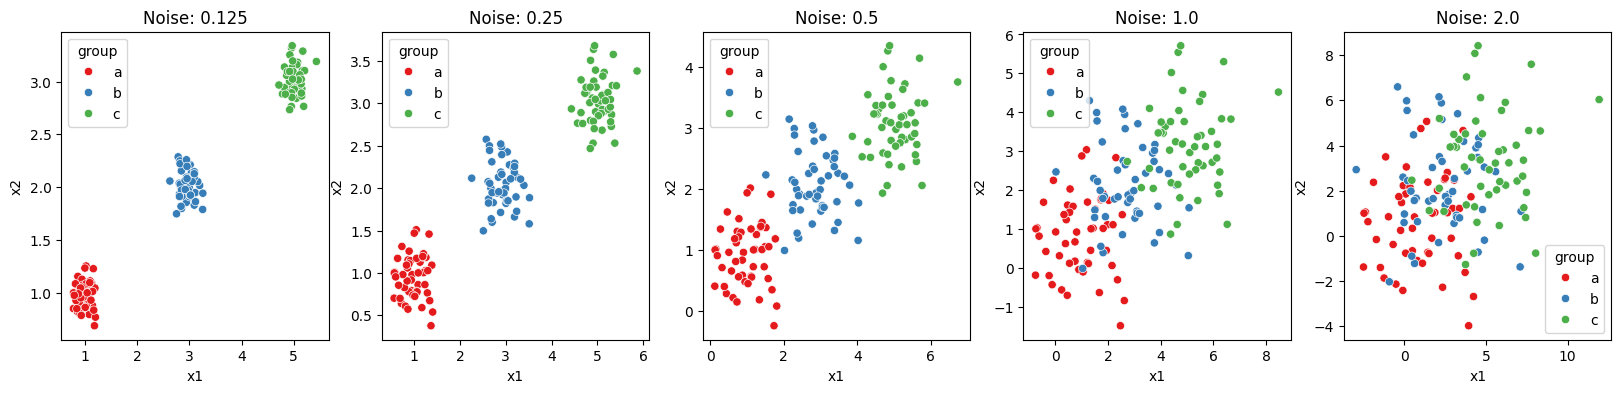

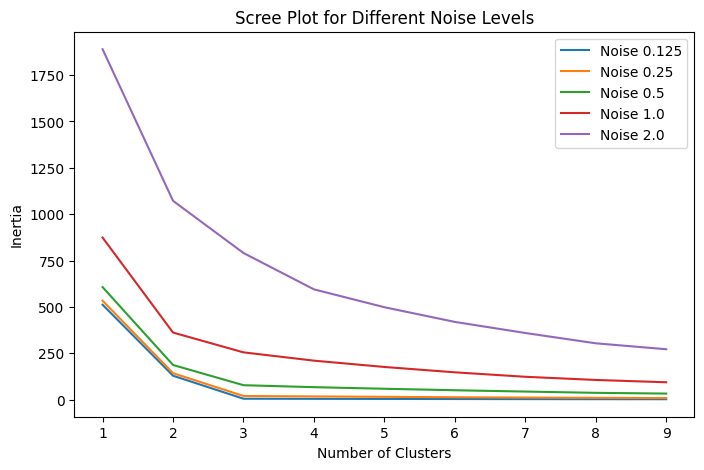

In [3]:
# Q1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Function to generate data with varying noise levels
def createData(noise, N=50):
    np.random.seed(100)  # Set seed for replicability
    X1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)])
    X2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)])
    X3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)])
    gdf1 = pd.DataFrame({'x1': X1[0, :], 'x2': X1[1, :], 'group': 'a'})
    gdf2 = pd.DataFrame({'x1': X2[0, :], 'x2': X2[1, :], 'group': 'b'})
    gdf3 = pd.DataFrame({'x1': X3[0, :], 'x2': X3[1, :], 'group': 'c'})
    df = pd.concat([gdf1, gdf2, gdf3], axis=0)
    return df

# Create datasets with increasing noise levels
datasets = {
    0.125: createData(0.125),
    0.25: createData(0.25),
    0.5: createData(0.5),
    1.0: createData(1.0),
    2.0: createData(2.0)
}

# Scatterplots to visualize clusters
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, (noise, df) in zip(axes, datasets.items()):
    sns.scatterplot(x='x1', y='x2', hue='group', data=df, ax=ax, palette='Set1')
    ax.set_title(f'Noise: {noise}')
plt.show()

# Scree plots to determine optimal clusters
fig, ax = plt.subplots(figsize=(8, 5))
for noise, df in datasets.items():
    X = df[['x1', 'x2']]
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10).fit(X)
        inertia.append(kmeans.inertia_)
    ax.plot(range(1, 10), inertia, label=f'Noise {noise}')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
ax.set_title('Scree Plot for Different Noise Levels')
ax.legend()
plt.show()


As we increase the noise level from 0.125 to 2.0, the distinctiveness of clusters decreases.
- At low noise (0.125), clusters are well-separated, and the scree plot shows a clear elbow, making it easy to choose K.
- As noise increases, cluster boundaries become more blurred, making the elbow less distinct.
- When noise is very high (2.0), data points are widely spread, and choosing an optimal number of clusters becomes difficult.

The elbow point in the scree plot represents where adding more clusters no longer significantly reduces inertia.
This means beyond a certain K, additional clusters do not improve clustering quality much.

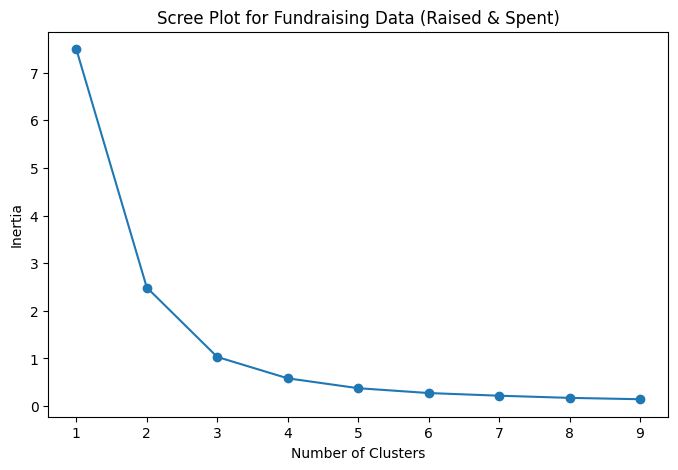

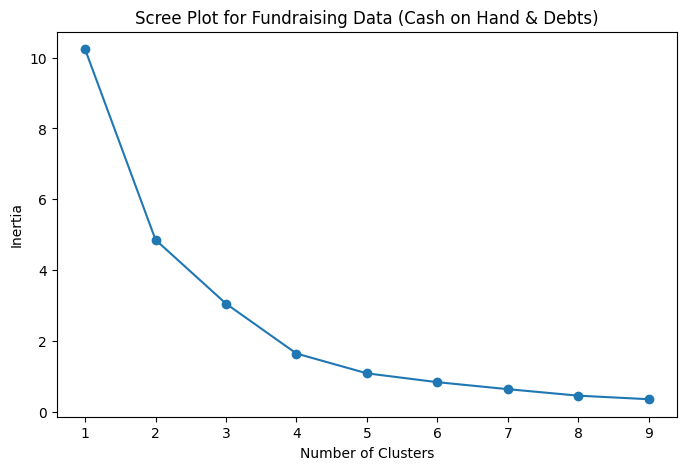

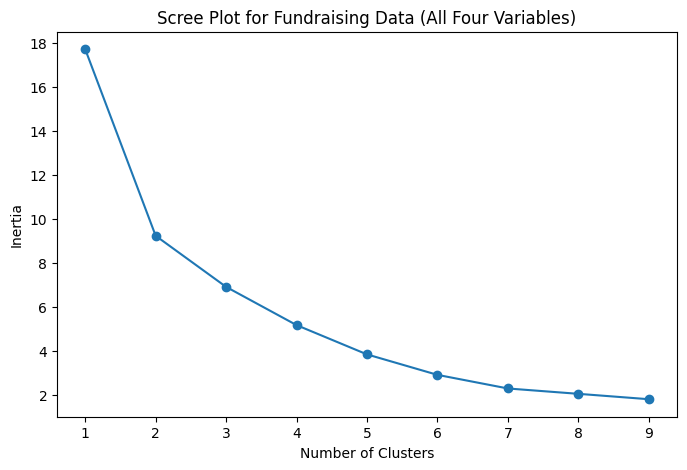

   index              Member       Party       State Chamber    Raised  \
0      0  Abigail Spanberger  Democratic    Virginia   House  0.103512   
1      1      Adam Kinzinger  Republican    Illinois   House  0.040686   
2      2         Adam Schiff  Democratic  California   House  0.254404   
3      3          Adam Smith  Democratic  Washington   House  0.029527   
4      4        Adrian Smith  Republican    Nebraska   House  0.034148   

      Spent  Cash on Hand  Debts  Cluster_RS  Cluster_CD  Cluster_All  
0  0.098074      0.040154    0.0           0           0            0  
1  0.016371      0.111166    0.0           0           0            0  
2  0.183753      0.920268    0.0           2           1            1  
3  0.015449      0.030150    0.0           0           0            0  
4  0.021915      0.050962    0.0           0           0            0  


In [2]:
# Q2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load Election Data
file_path = '/content/2022 election cycle fundraising.csv'
df = pd.read_csv(file_path)

# Clean and Normalize Data
financial_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
for col in financial_cols:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

df_cleaned = df.dropna(subset=financial_cols)
scaler = MinMaxScaler()
df_cleaned[financial_cols] = scaler.fit_transform(df_cleaned[financial_cols])

# Scree Plot for Raised & Spent
inertia_RS = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10).fit(df_cleaned[['Raised', 'Spent']])
    inertia_RS.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_RS, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for Fundraising Data (Raised & Spent)')
plt.show()

# Apply K-Means Clustering for Raised & Spent
optimal_k_RS = 3
kmeans_RS = KMeans(n_clusters=optimal_k_RS, random_state=100, n_init=10).fit(df_cleaned[['Raised', 'Spent']])
df_cleaned['Cluster_RS'] = kmeans_RS.labels_

# Scree Plot for Cash on Hand & Debts
inertia_CD = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10).fit(df_cleaned[['Cash on Hand', 'Debts']])
    inertia_CD.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_CD, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for Fundraising Data (Cash on Hand & Debts)')
plt.show()

# Apply K-Means Clustering for Cash on Hand & Debts
optimal_k_CD = 3
kmeans_CD = KMeans(n_clusters=optimal_k_CD, random_state=100, n_init=10).fit(df_cleaned[['Cash on Hand', 'Debts']])
df_cleaned['Cluster_CD'] = kmeans_CD.labels_

# Scree Plot for All Variables
inertia_all = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10).fit(df_cleaned[['Raised', 'Spent', 'Cash on Hand', 'Debts']])
    inertia_all.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_all, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for Fundraising Data (All Four Variables)')
plt.show()

# Apply K-Means Clustering on All Variables
optimal_k_all = 3
kmeans_all = KMeans(n_clusters=optimal_k_all, random_state=100, n_init=10).fit(df_cleaned[['Raised', 'Spent', 'Cash on Hand', 'Debts']])
df_cleaned['Cluster_All'] = kmeans_all.labels_

# Display final dataset with clusters
print(df_cleaned.head())
df_cleaned.to_csv("election_fundraising_clusters.csv", index=False)
